<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch9_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 4/bargainnumeric.xlsx')

In [ ]:
df3 = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 4/CRMclean.xlsx', sheet_name="Sheet1")

In [ ]:
ecom = pd.read_csv("/content/drive/MyDrive/BI BA Handbook/Chapter 9/EcommerceCustomers.csv")

eCommerce dataset from https://www.kaggle.com/datasets/iabdulw/ecommerce-customer-data

## K Means

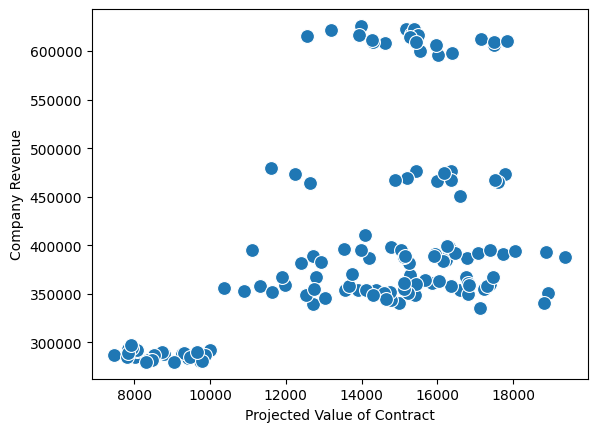

In [ ]:
from seaborn import scatterplot
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 10

scatterplot(x=df3["Q4"],y=df3["Q2"])
plt.xlabel('Projected Value of Contract')
plt.ylabel('Company Revenue')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x = np.array(df3[["Q4","Q2"]])

In [ ]:
kmeans = KMeans(n_clusters = 6)

In [ ]:
clust = kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cl = kmeans.labels_
cl

array([2, 2, 0, 2, 4, 4, 1, 2, 4, 2, 2, 2, 4, 4, 5, 0, 2, 2, 2, 2, 4, 5,
       2, 2, 2, 2, 2, 2, 5, 4, 5, 4, 0, 4, 4, 5, 1, 5, 4, 4, 4, 5, 5, 5,
       1, 5, 3, 0, 0, 5, 4, 5, 5, 1, 4, 2, 4, 4, 2, 3, 3, 0, 0, 5, 0, 4,
       2, 5, 5, 2, 3, 1, 1, 5, 4, 4, 3, 0, 1, 0, 2, 2, 0, 1, 1, 1, 4, 5,
       2, 2, 1, 0, 3, 0, 1, 3, 2, 1, 1, 1, 0, 1, 4, 0, 4, 0, 0, 1, 0, 0,
       3, 0, 1, 0, 1, 0, 0, 4, 4, 3, 1, 1, 5, 3, 3, 1, 0, 0, 3, 4, 0, 0,
       3, 3, 0], dtype=int32)

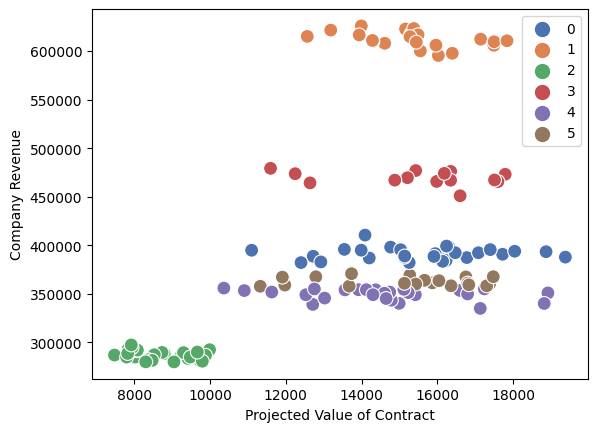

In [ ]:
from seaborn import scatterplot
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 10

scatterplot(x=df3["Q4"],y=df3["Q2"], hue=cl, palette="deep")
plt.xlabel('Projected Value of Contract')
plt.ylabel('Company Revenue')
plt.show()

### Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

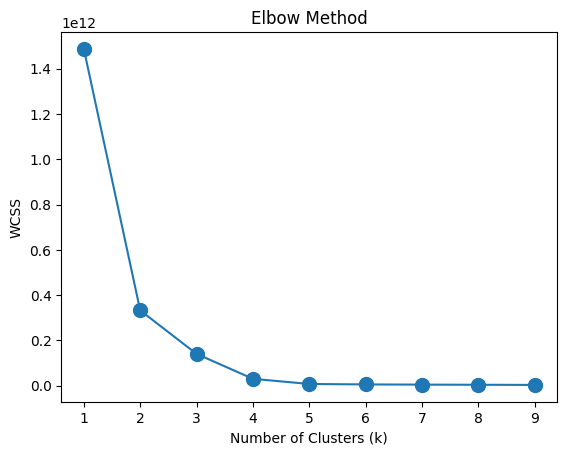

In [ ]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


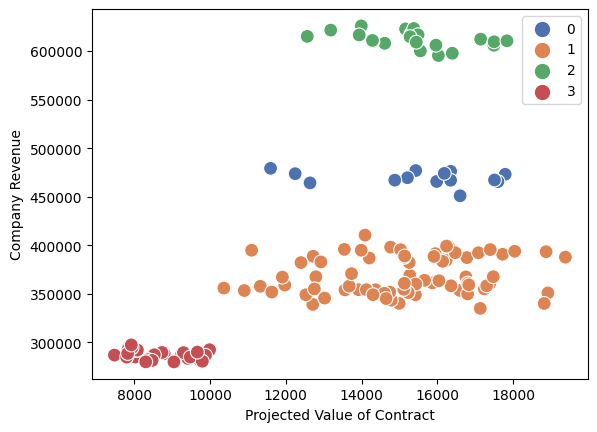

In [ ]:
kmeans = KMeans(n_clusters = 4)
clust = kmeans.fit(x)
cl = kmeans.labels_

mpl.rcParams['lines.markersize'] = 10
scatterplot(x=df3["Q4"],y=df3["Q2"], hue=cl, palette="deep")
plt.xlabel('Projected Value of Contract')
plt.ylabel('Company Revenue')
plt.show()

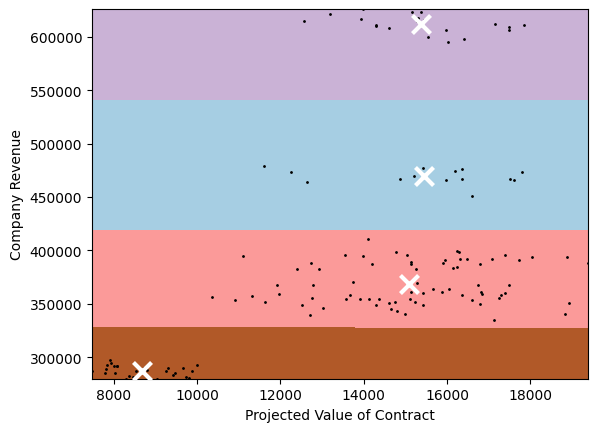

In [ ]:
h = 20
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
       extent=(xx.min(), xx.max(), yy.min(), yy.max()),
       cmap=plt.cm.Paired,
       aspect='auto', origin='lower')

plt.plot(x[:, 0], x[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
        marker='x', s=169, linewidths=3,
        color='w', zorder=10)
plt.xlim(x_min, x_max)
plt.xlabel('Projected Value of Contract')
plt.ylim(y_min, y_max)
plt.ylabel('Company Revenue')
plt.show()

### Silhouette coefficient (0 no meaningful cluster, 1 clusters are different, -1 assigned to wrong clusters)

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
x = np.array(df3[["Q4","Q2"]])

In [ ]:
n_clusters = 4

In [ ]:
kmeans = KMeans(n_clusters = n_clusters)
clust = kmeans.fit(x)
cl = clust.labels_

sil_score = silhouette_score(x, cl)
sil_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.792207331319125

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

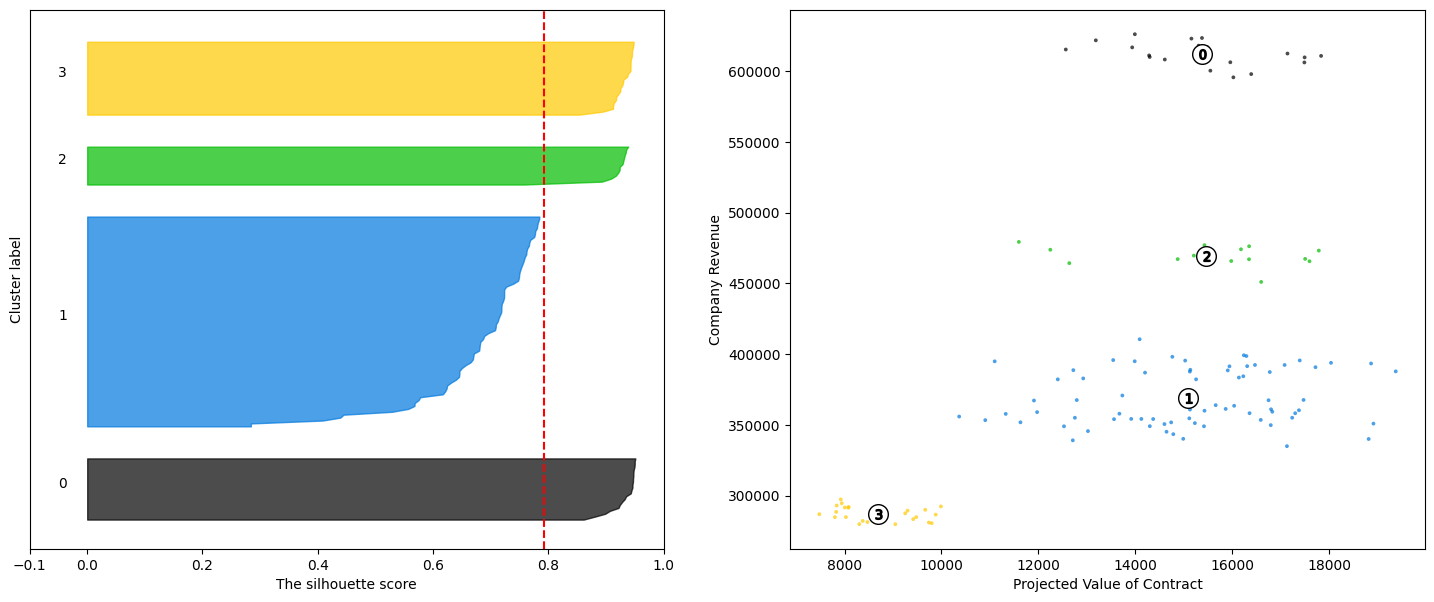

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

sample_silhouette_values = silhouette_samples(x, cl)
y_lower = 10

for i in range(n_clusters):

    ith_cluster_silhouette_values = sample_silhouette_values[cl == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.set_xlabel("The silhouette score")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=sil_score, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

colors = cm.nipy_spectral(cl.astype(float) / n_clusters)
ax2.scatter(
        x[:, 0], x[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

centers = kmeans.cluster_centers_
ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_xlabel("Projected Value of Contract")
    ax2.set_ylabel("Company Revenue")

plt.show()

### Calinski Harabasz (well seperated - likes more clusters)

In [ ]:
from sklearn.metrics import calinski_harabasz_score

In [ ]:
x = np.array(df3[["Q4","Q2"]])
n_clusters = 6
kmeans = KMeans(n_clusters = n_clusters)
clust = kmeans.fit(x)
cl = clust.labels_

ch_score = calinski_harabasz_score(x, cl)
ch_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7315.680065985381

In [ ]:
x = np.array(df3[["Q4","Q2"]])
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters)
clust = kmeans.fit(x)
cl = clust.labels_

ch_score = calinski_harabasz_score(x, cl)
ch_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2122.8491375432595

### Davies Bouldin (lower is better)

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
x = np.array(df3[["Q4","Q2"]])
n_clusters = 6
kmeans = KMeans(n_clusters = n_clusters)
clust = kmeans.fit(x)
cl = clust.labels_

db_score = davies_bouldin_score(x, cl)
db_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.35161168661287917

In [ ]:
x = np.array(df3[["Q4","Q2"]])
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters)
clust = kmeans.fit(x)
cl = clust.labels_

db_score = davies_bouldin_score(x, cl)
db_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.21380129707298184

## Heirarchical

Comparison of Hierarchical Methods (https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py)



In [ ]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
n_samples = 1500
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=170
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=170)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=170)
rng = np.random.RandomState(170)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170
)

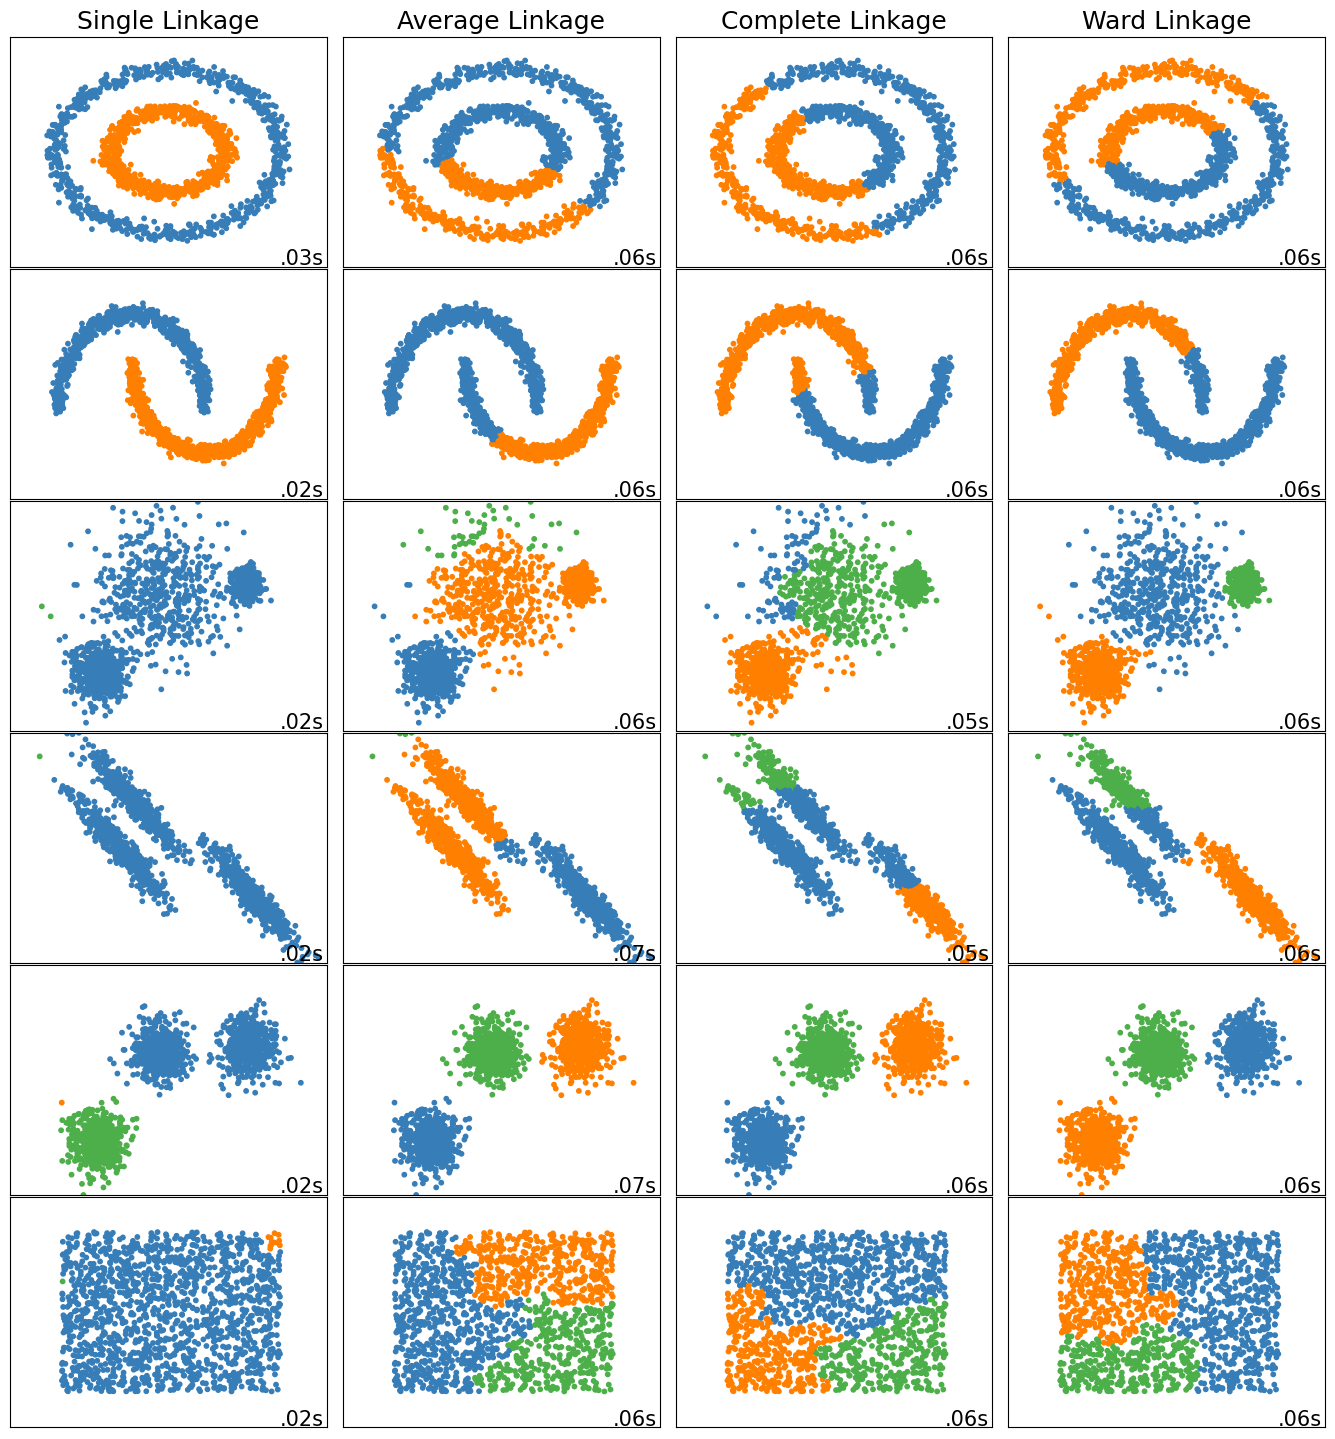

In [ ]:
# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {"n_neighbors": 10, "n_clusters": 3}

datasets = [
    (noisy_circles, {"n_clusters": 2}),
    (noisy_moons, {"n_clusters": 2}),
    (varied, {"n_neighbors": 2}),
    (aniso, {"n_neighbors": 2}),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward"
    )
    complete = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="complete"
    )
    average = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="average"
    )
    single = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="single"
    )

    clustering_algorithms = (
        ("Single Linkage", single),
        ("Average Linkage", average),
        ("Complete Linkage", complete),
        ("Ward Linkage", ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()


### Measurement (ratio) - Single

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

In [ ]:
x = np.array(df3[["Q4","Q2"]])

In [ ]:
cluster = AgglomerativeClustering(n_clusters=6, linkage='single')
clust = cluster.fit(x)
cl = clust.labels_
cl

array([3, 3, 0, 3, 0, 0, 1, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 3, 2, 4, 0, 0, 0, 0, 0,
       3, 0, 0, 3, 2, 1, 1, 0, 0, 0, 2, 0, 1, 0, 3, 3, 0, 1, 1, 1, 0, 0,
       3, 3, 1, 5, 2, 0, 1, 2, 3, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0,
       2, 2, 0])

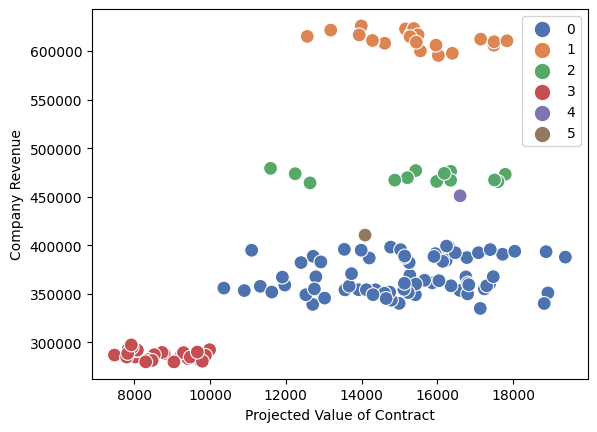

In [ ]:
from seaborn import scatterplot
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 10

scatterplot(x=df3["Q4"],y=df3["Q2"], hue=cl, palette="deep")
plt.xlabel('Projected Value of Contract')
plt.ylabel('Company Revenue')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
x = np.array(df3[["Q4","Q2"]])
n_clusters = 4

cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
clust = cluster.fit(x)
cl = clust.labels_

In [ ]:
sil_score = silhouette_score(x, cl)
sil_score


0.792207331319125

In [ ]:
ch_score = calinski_harabasz_score(x, cl)
ch_score

2122.8491375432595

In [ ]:
db_score = davies_bouldin_score(x, cl)
db_score

0.2138012970729818

### Measurement (ratio) - Average

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

In [ ]:
x = np.array(df3[["Q4","Q2"]])

In [ ]:
cluster = AgglomerativeClustering(n_clusters=6, linkage='average')
clust = cluster.fit(x)
cl = clust.labels_
cl

array([3, 3, 2, 3, 4, 4, 1, 3, 4, 3, 3, 3, 4, 4, 4, 2, 3, 3, 3, 3, 4, 4,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 0, 2, 2, 4, 4, 4, 4, 1, 4, 3, 4, 4, 3, 0, 0, 2, 2, 4, 2, 4,
       3, 4, 4, 3, 0, 1, 1, 4, 4, 4, 0, 2, 1, 2, 3, 3, 2, 1, 1, 1, 4, 4,
       3, 3, 1, 5, 0, 2, 1, 0, 3, 1, 1, 1, 2, 1, 4, 2, 4, 2, 2, 1, 2, 2,
       0, 2, 1, 2, 1, 2, 2, 4, 4, 0, 1, 1, 4, 0, 0, 1, 2, 2, 0, 4, 2, 2,
       0, 0, 2])

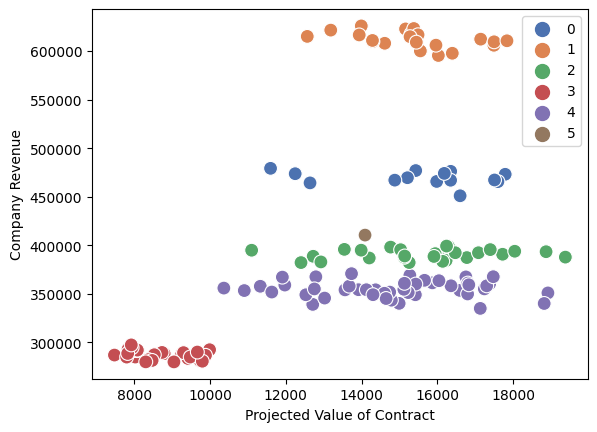

In [ ]:
from seaborn import scatterplot
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 10

scatterplot(x=df3["Q4"],y=df3["Q2"], hue=cl, palette="deep")
plt.xlabel('Projected Value of Contract')
plt.ylabel('Company Revenue')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
x = np.array(df3[["Q4","Q2"]])
n_clusters = 6
linkage = "average"

In [ ]:
cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
clust = cluster.fit(x)
cl = clust.labels_

In [ ]:
sil_score = silhouette_score(x, cl)
sil_score

0.7742399119635827

In [ ]:
ch_score = calinski_harabasz_score(x, cl)
ch_score

5641.825140277156

In [ ]:
db_score = davies_bouldin_score(x, cl)
db_score

0.21434868820374617

### Measurement (ratio) - Complete

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

In [ ]:
x = np.array(df3[["Q4","Q2"]])

In [ ]:
cluster = AgglomerativeClustering(n_clusters=6, linkage='complete')
clust = cluster.fit(x)
cl = clust.labels_
cl

array([3, 3, 1, 3, 4, 5, 0, 3, 5, 3, 3, 3, 5, 4, 4, 1, 3, 3, 3, 3, 4, 4,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 2, 1, 1, 4, 4, 4, 4, 0, 4, 3, 4, 4, 3, 2, 2, 1, 1, 4, 1, 4,
       3, 4, 4, 3, 2, 0, 0, 4, 4, 4, 2, 1, 0, 1, 3, 3, 1, 0, 0, 0, 5, 4,
       3, 3, 0, 1, 2, 1, 0, 2, 3, 0, 0, 0, 1, 0, 5, 1, 4, 1, 1, 0, 1, 1,
       2, 1, 0, 1, 0, 1, 1, 4, 5, 2, 0, 0, 4, 2, 2, 0, 1, 1, 2, 5, 1, 1,
       2, 2, 1])

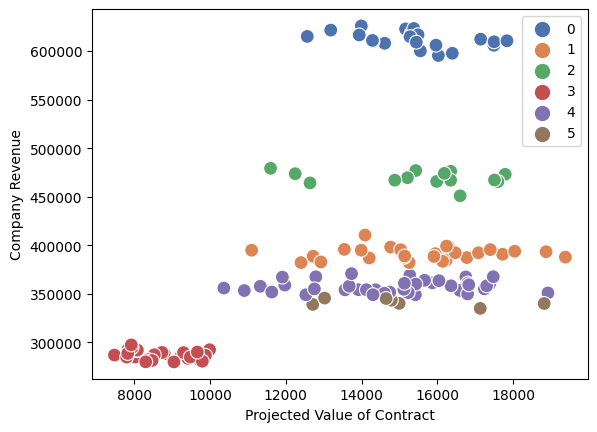

In [ ]:
from seaborn import scatterplot
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 10

scatterplot(x=df3["Q4"],y=df3["Q2"], hue=cl, palette="deep")
plt.xlabel('Projected Value of Contract')
plt.ylabel('Company Revenue')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
x = np.array(df3[["Q4","Q2"]])
n_clusters = 6
linkage = "complete"

In [ ]:
cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
clust = cluster.fit(x)
cl = clust.labels_

sil_score = silhouette_score(x, cl)
sil_score

0.7375466215187642

In [ ]:
ch_score = calinski_harabasz_score(x, cl)
ch_score

6870.804658608031

In [ ]:
db_score = davies_bouldin_score(x, cl)
db_score

0.3067785176779913

PRACTICE

Measurement (ratio) - Ward

In [ ]:
x = np.array(df3[["Q4","Q2"]])

Opinions (Ordinal) - Ward

In [ ]:
x = np.array(df2[["Q18","Q20"]])

### Create loop to compare different number of clusters

In [ ]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
x = np.array(df2[["Q18","Q20", "Q15", "Q6"]])
n_clus = [2, 3, 4, 5, 6]
link = "ward"

In [ ]:
compare = []

for i in range(len(n_clus)):

  cluster = AgglomerativeClustering(n_clusters=n_clus[i], linkage=link)
  clust = cluster.fit(x)
  cl = clust.labels_

  sil_score = silhouette_score(x, cl)
  ch_score = calinski_harabasz_score(x, cl)
  db_score = davies_bouldin_score(x, cl)

  compare.append([n_clus[i], sil_score, ch_score, db_score])

df_compare = pd.DataFrame(compare)
df_compare.columns = ["nclusters", "silscore", "chscore", "dbscore"]

In [ ]:
df_compare

,nclusters,silscore,chscore,dbscore
0,2,0.423920,41.855994,0.952316
1,3,0.500615,57.321904,0.840759
2,4,0.537490,57.430440,0.850172
3,5,0.642715,63.955565,0.736222
4,6,0.700413,85.648428,0.581383


### Dendrogram

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [ ]:
x = np.array(df2[["Q18","Q20", "Q15", "Q6"]])

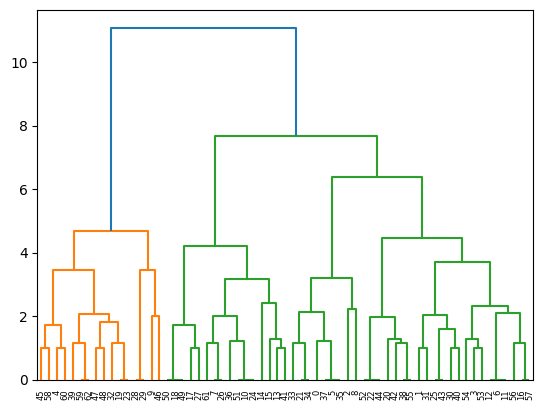

In [ ]:
z = hierarchy.linkage(x, 'ward')
hierarchy.dendrogram(z)
plt.show()

In [ ]:
x2 = df2[["Q6", "Q13", "Q14", "Q15", "Q18", "Q20"]].to_numpy()

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(x2)
y_pred = cluster.fit_predict(x2)
y_pred

array([2, 1, 0, 3, 1, 0, 2, 3, 2, 1, 4, 2, 2, 0, 4, 3, 1, 4, 3, 1, 0, 2,
       0, 1, 0, 2, 3, 3, 1, 1, 0, 3, 1, 2, 0, 2, 3, 0, 3, 3, 3, 4, 0, 2,
       0, 3, 1, 3, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0])

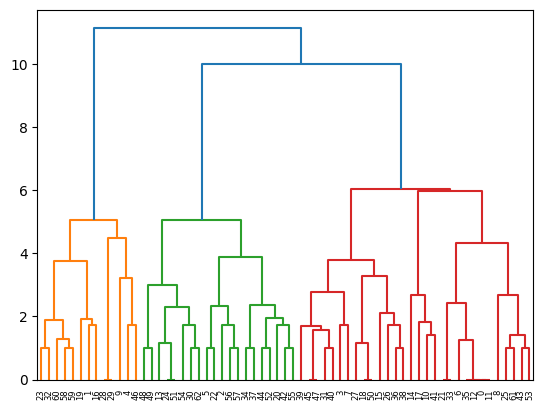

In [ ]:
z = hierarchy.linkage(x2, 'ward')
hierarchy.dendrogram(z)
plt.show()

## Business Use Case

In [ ]:
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
x = np.array(ecom[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership", "Yearly Amount Spent"]])

In [ ]:
n_clus = [2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
compare = []

for i in range(len(n_clus)):
    kmeans = KMeans(n_clusters = n_clus[i])
    clust = kmeans.fit(x)
    cl = kmeans.labels_
    cl

    sil_score = silhouette_score(x, cl)
    ch_score = calinski_harabasz_score(x, cl)
    db_score = davies_bouldin_score(x, cl)

    compare.append([n_clus[i], sil_score, ch_score, db_score])

df_compare = pd.DataFrame(compare)
df_compare.columns = ["nclusters", "silscore", "chscore", "dbscore"]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
df_compare

,nclusters,silscore,chscore,dbscore
0,2,0.534184,772.357857,0.625269
1,3,0.525129,931.450900,0.581310
2,4,0.521864,1050.885950,0.562551
3,5,0.538829,1290.590338,0.550948
4,6,0.536121,1480.938309,0.507403
5,7,0.532577,1734.952862,0.520024
6,8,0.530661,1868.938078,0.510588
7,9,0.530247,2157.056114,0.509799


In [ ]:
kmeans = KMeans(n_clusters = 5)
clust = kmeans.fit(x)
cl = kmeans.labels_
cl

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 1, 4, 4, 2, 1, 4, 4, 3, 1, 1, 3, 4, 1, 1, 3, 3, 3, 4, 4, 3,
       3, 1, 2, 3, 2, 1, 4, 4, 1, 3, 4, 1, 1, 1, 0, 1, 1, 4, 4, 1, 4, 4,
       3, 4, 4, 4, 1, 3, 2, 3, 3, 3, 1, 1, 1, 3, 1, 4, 2, 1, 2, 1, 4, 2,
       4, 1, 3, 3, 3, 4, 3, 4, 4, 1, 3, 4, 1, 1, 1, 1, 4, 0, 4, 4, 1, 1,
       4, 1, 3, 2, 1, 3, 1, 4, 1, 2, 1, 1, 1, 3, 3, 1, 3, 1, 1, 0, 4, 4,
       1, 1, 3, 3, 2, 3, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 1, 1, 4, 3, 4, 4,
       3, 4, 3, 1, 4, 3, 1, 3, 3, 1, 1, 0, 1, 1, 1, 1, 3, 1, 3, 2, 4, 2,
       4, 1, 4, 2, 1, 4, 1, 0, 4, 1, 4, 1, 1, 4, 1, 1, 3, 3, 2, 0, 1, 0,
       4, 4, 4, 1, 1, 4, 1, 3, 4, 1, 3, 4, 1, 1, 2, 1, 1, 4, 3, 3, 0, 2,
       4, 1, 1, 4, 3, 3, 4, 2, 3, 4, 3, 1, 1, 4, 4, 4, 0, 4, 3, 4, 3, 1,
       1, 4, 1, 4, 4, 0, 4, 1, 1, 3, 4, 1, 2, 1, 1, 1, 1, 0, 3, 4, 3, 4,
       3, 1, 4, 3, 4, 2, 3, 1, 1, 3, 3, 1, 1, 1, 4, 4, 2, 0, 2, 1, 0, 1,
       2, 4, 4, 3, 1, 4, 4, 2, 4, 2, 3, 4, 3, 2, 4, 3, 1, 4, 1, 0, 1, 1,
       2, 3, 0, 1, 1, 0, 4, 3, 4, 3, 1, 1, 4, 0, 1,

In [ ]:
ecom["Label"]=cl

In [ ]:
from seaborn import violinplot
import matplotlib.pyplot as plt

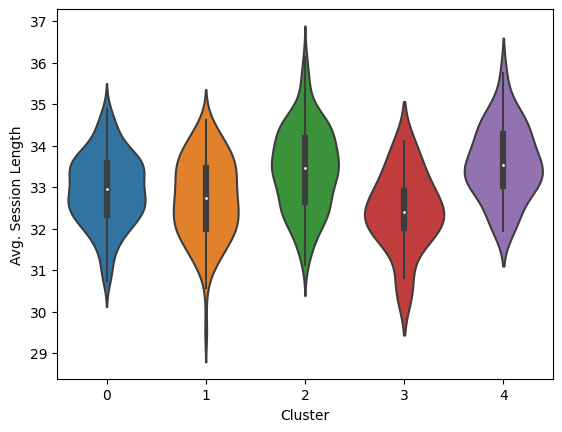

In [ ]:
violinplot(data=ecom, x="Label", y="Avg. Session Length")
plt.ylabel('Avg. Session Length')
plt.xlabel('Cluster')
plt.show()

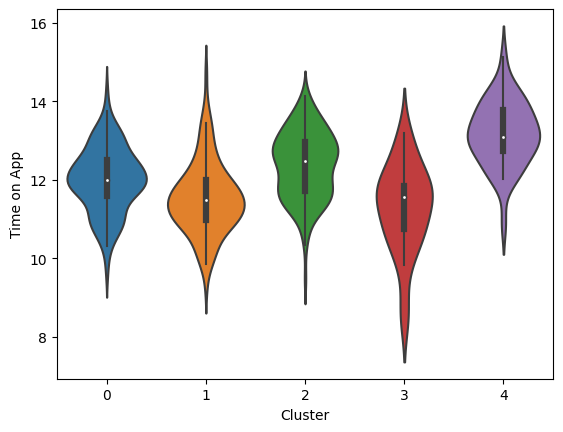

In [ ]:
violinplot(data=ecom, x="Label", y="Time on App")
plt.ylabel('Time on App')
plt.xlabel('Cluster')
plt.show()

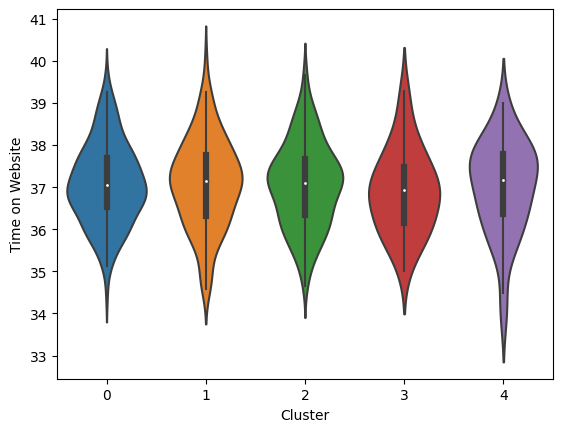

In [ ]:
violinplot(data=ecom, x="Label", y="Time on Website")
plt.ylabel("Time on Website")
plt.xlabel('Cluster')
plt.show()

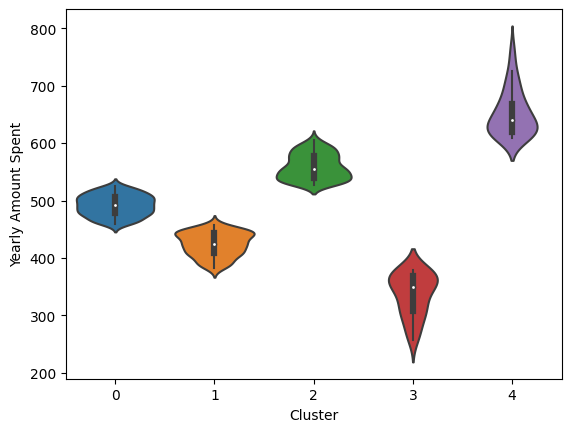

In [ ]:
violinplot(data=ecom, x="Label", y="Yearly Amount Spent")
plt.ylabel("Yearly Amount Spent")
plt.xlabel('Cluster')
plt.show()

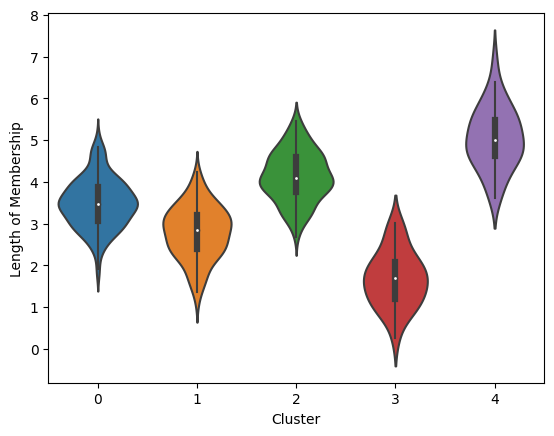

In [ ]:
violinplot(data=ecom, x="Label", y="Length of Membership")
plt.ylabel("Length of Membership")
plt.xlabel('Cluster')
plt.show()

### Radarplot

In [ ]:
import plotly.graph_objects as go

In [ ]:
def standardize(column):
    return (column - column.mean())/column.std()

In [ ]:
ecom_std = ecom[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership", "Yearly Amount Spent"]].apply(standardize)

In [ ]:
ecom_std["Label"]=ecom["Label"]

In [ ]:
sumtable = ecom_std.groupby(by=["Label"]).mean()

In [ ]:
sumtable

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Label,,,,,
0,-0.639135,-0.775163,-0.154829,-1.860446,-2.049773
1,-0.122768,-0.053673,0.020039,-0.039768,-0.093691
2,0.525176,1.130123,-0.057070,1.516708,1.930234
3,-0.318375,-0.519100,0.031753,-0.740068,-0.947191
4,0.382570,0.327020,-0.002564,0.598697,0.753192


In [ ]:
cat = ["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership", "Yearly Amount Spent"]
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r= sumtable.iloc[4],
      theta=cat,
      fill="toself",
      name="Cluster 5"
))

fig.add_trace(go.Scatterpolar(
      r= sumtable.iloc[3],
      theta=cat,
      fill="toself",
      name="Cluster 4"
))

fig.add_trace(go.Scatterpolar(
      r= sumtable.iloc[2],
      theta=cat,
      fill="toself",
      name="Cluster 3"
))

fig.add_trace(go.Scatterpolar(
      r= sumtable.iloc[1],
      theta=cat,
      fill="toself",
      name="Cluster 2"
))

fig.add_trace(go.Scatterpolar(
      r= sumtable.iloc[0],
      theta=cat,
      fill="toself",
      name="Cluster 1"
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-3, 3]
    )),
  showlegend=False
)

fig.show()

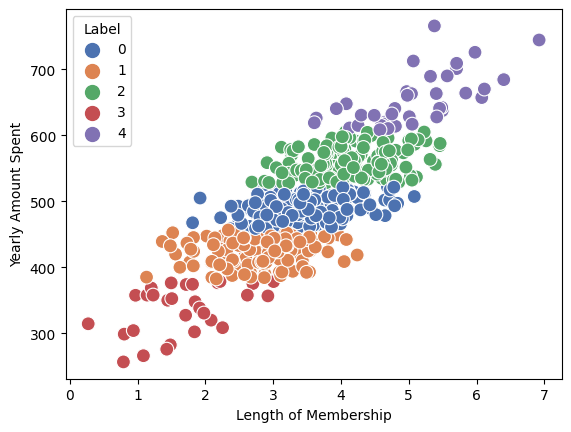

In [ ]:
from seaborn import scatterplot
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 10

scatterplot(x=ecom["Length of Membership"],y=ecom["Yearly Amount Spent"], hue=ecom["Label"], palette="deep")
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.show()

## DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x = np.array(df3[["Q4", "Q2"]])

In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
KNN = NearestNeighbors(n_neighbors=4)
neighbors = KNN.fit(x)
distances, indices = neighbors.kneighbors(x)

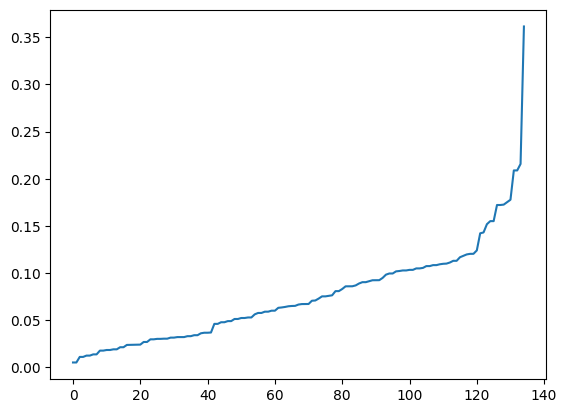

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [ ]:
dbs = DBSCAN(eps=0.15, min_samples=4)
dbs.fit(x)
cl = dbs.labels_
cl

array([ 0,  0, -1,  0,  1,  1,  4,  0, -1,  0,  0,  0,  1,  1,  1,  2,  0,
        0,  0,  0,  1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  1,  5,  2,  1,
        1,  5,  6, -1,  1, -1,  1,  1,  1, -1,  6,  1, -1, -1,  1,  1,  1,
        1,  1,  3,  1,  0,  1, -1,  0, -1, -1, -1,  2,  1,  1, -1,  0,  1,
        1,  0, -1,  3,  4,  1,  1,  5,  7,  2,  3, -1,  0,  0,  1,  3,  3,
        3, -1,  1,  0,  0, -1, -1, -1, -1,  4, -1,  0,  6,  3,  3,  1,  4,
        1, -1, -1, -1, -1, -1,  2, -1, -1,  1, -1, -1,  6,  2, -1,  1, -1,
       -1,  6, -1,  1, -1, -1, -1,  2,  2,  7,  5, -1,  2,  7,  7, -1])

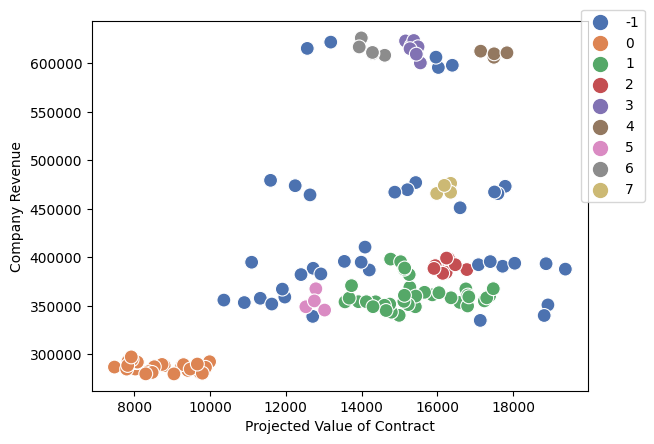

In [ ]:
from seaborn import scatterplot
import matplotlib as mpld
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 10

scatterplot(x=df3["Q4"],y=df3["Q2"], hue=cl, palette="deep")
plt.xlabel('Projected Value of Contract')
plt.ylabel('Company Revenue')
plt.legend(loc='upper center', bbox_to_anchor=(1.05, 1.05), ncol=1)
plt.show()

In [ ]:
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Label
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,4
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,3
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,1
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,4
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,4


In [ ]:
x = np.array(ecom[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership", "Yearly Amount Spent"]])

In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
KNN = NearestNeighbors(n_neighbors=10)
neighbors = KNN.fit(x)
distances, indices = neighbors.kneighbors(x)

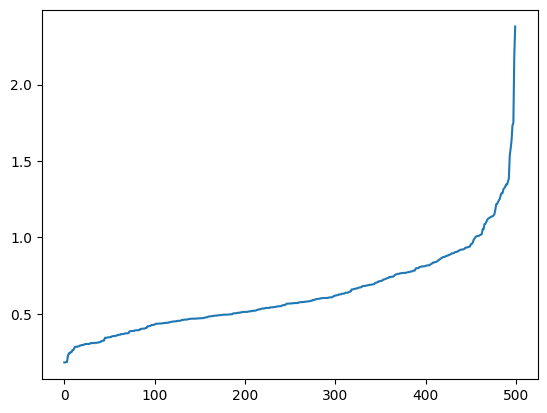

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [ ]:
dbs = DBSCAN(eps=1, min_samples=10)
dbs.fit(x)
cl = dbs.labels_
cl

array([-1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,
        0, -1, -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,
        0, -1, -1, -1,  0, -1, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,
       -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,
       -1, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0, -1, -1, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0, -1,
       -1, -1,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0, -1,  0,
        0, -1, -1,  0, -1

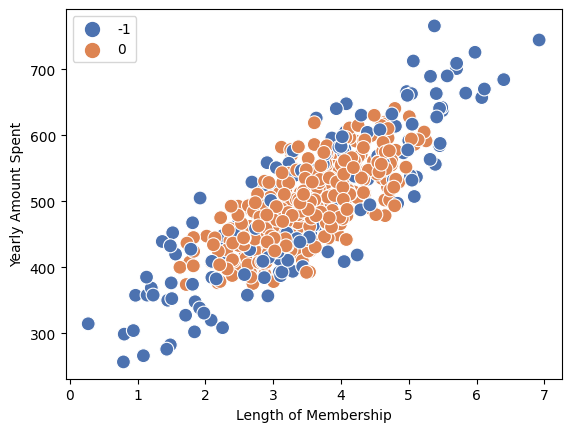

In [ ]:
from seaborn import scatterplot
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 10

scatterplot(x=ecom["Length of Membership"],y=ecom["Yearly Amount Spent"], hue=cl, palette="deep")
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.show()

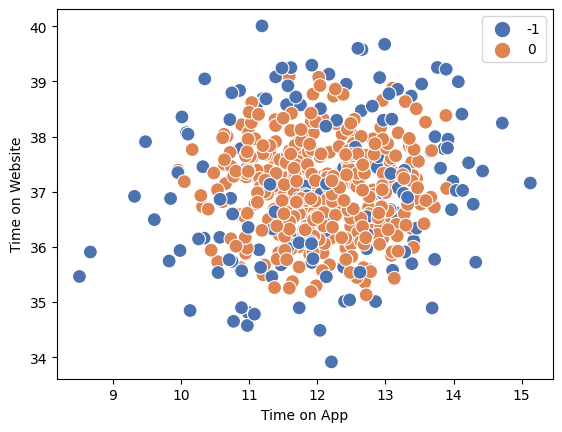

In [ ]:
from seaborn import scatterplot
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['lines.markersize'] = 10

scatterplot(x=ecom["Time on App"],y=ecom["Time on Website"], hue=cl, palette="deep")
plt.xlabel("Time on App")
plt.ylabel("Time on Website")
plt.show()